Background: Introduce the purpose, background of the experiment.
There are many factors that affect the price of a house, and it would be great if there were a system that could predict the price of your dream house.


Data acquisition: How the data is generated.
The origin data is from https://github.com/Shreyas3108/house-price-prediction
I use split.py to generate my data, train.csv.
At first, I only used the first 1000 rows of data, but I felt the effect was very poor. Then I used all the data, 21612 lines.


"Perhaps, you need to install the following package"
pip install -U scikit-learn
pip install pandas seaborn pandas matplotlib numpy




Algorithm: The optimization model and the applied alogrithm, especially the alogrithm parameters.

"The cost is too large, use regularization techniques.".

In [2]:
import copy, math, random
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
np.set_printoptions(precision=2)  # reduced display precision on numpy arrays

In [3]:
# Read csv file
train = np.loadtxt("./data/train.csv", delimiter=",", dtype=float)

def meanNormalization(X):
    columnsMean=np.mean(X,0)    #求出了每一列的平均值，注：0表示求列的均值，1表示求行的均值
    columnsStd=np.std(X,0)      #求出了每一列的标准差，注：0表示求列的标准差值，1表示求行的标准差

    #接下来我们需要对每一列的值都进行归一化操作，所以我们要枚举每一列
    for i in range(X.shape[1]):
        X[:,i]=(X[:,i]-columnsMean[i])/columnsStd[i]       #归一化操作，X的每一列中的每一行值都会减去当前列的均值，然后除去方差。
    return X

# 定义min-max标准化函数
def minMaxNormalization(X):
    columnsMin = np.min(X, 0) # 求出每一列的最小值
    columnsMax = np.max(X, 0) # 求出每一列的最大值
    # 对每一列的值进行归一化操作
    for i in range(X.shape[1]):
        X[:, i] = (X[:, i] - columnsMin[i]) / (columnsMax[i] - columnsMin[i]) # 归一化操作，X的每一列中的每一行值都会减去当前列的最小值，然后除以当前列的极差。
    return X

# 调用min-max标准化函数
minMaxNormalization(train)


y_train , X_train = np.split(train, [1], axis=1)

In [4]:
# data is stored in numpy array/matrix
print(f"X Shape: {X_train.shape}, X Type:{type(X_train)})")
print(X_train)
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")
print(y_train)

X Shape: (21613, 10), X Type:<class 'numpy.ndarray'>)
[[9.09e-02 1.25e-01 6.72e-02 ... 4.78e-01 1.62e-01 5.74e-03]
 [9.09e-02 2.81e-01 1.72e-01 ... 4.43e-01 2.22e-01 8.03e-03]
 [6.06e-02 1.25e-01 3.62e-02 ... 2.87e-01 3.99e-01 8.51e-03]
 ...
 [6.06e-02 9.38e-02 5.51e-02 ... 9.48e-01 1.07e-01 1.56e-03]
 [9.09e-02 3.12e-01 9.89e-02 ... 9.04e-01 1.74e-01 7.31e-04]
 [6.06e-02 9.38e-02 5.51e-02 ... 9.39e-01 1.07e-01 8.11e-04]]
y Shape: (21613, 1), y Type:<class 'numpy.ndarray'>)
[[0.02]
 [0.06]
 [0.01]
 ...
 [0.04]
 [0.04]
 [0.03]]


In [5]:
# b_init = 785.1811367994083
# w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618, -26.42131618, 0.39133535, 18.75376741, -53.36032453, -26.42131618, -26.42131618])

b_init = np.random.randn()
w_init = np.random.randn(10)

print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (10,), b_init type: <class 'float'>


In [6]:
def predict_single_loop(x, w, b): 
    """
    single predict using linear regression
    
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters    
      b (scalar):  model parameter     
      
    Returns:
      p (scalar):  prediction
    """
    n = x.shape[0]
    p = 0
    for i in range(n):
        p_i = x[i] * w[i]  
        p = p + p_i         
    p = p + b                
    return p

In [7]:
# get a row from our training data
x_vec = X_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction
f_wb = predict_single_loop(x_vec, w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

x_vec shape (10,), x_vec value: [0.09 0.12 0.07 0.   0.5  0.5  0.1  0.48 0.16 0.01]
f_wb shape (), prediction: -1.1652172112987311


In [8]:
def predict(x, w, b): 
    """
    single predict using linear regression
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters   
      b (scalar):             model parameter 
      
    Returns:
      p (scalar):  prediction
    """
    p = np.dot(x, w) + b     
    return p    

In [9]:
# get a row from our training data
x_vec = X_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction
f_wb = predict(x_vec,w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

x_vec shape (10,), x_vec value: [0.09 0.12 0.07 0.   0.5  0.5  0.1  0.48 0.16 0.01]
f_wb shape (), prediction: -1.1652172112987313


In [10]:
# def compute_cost(X, y, w, b): 
#     """
#     compute cost
#     Args:
#       X (ndarray (m,n)): Data, m examples with n features
#       y (ndarray (m,)) : target values
#       w (ndarray (n,)) : model parameters  
#       b (scalar)       : model parameter
      
#     Returns:
#       cost (scalar): cost
#     """
#     m = X.shape[0]
#     cost = 0.0
#     for i in range(m):                                
#         f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
#         cost = cost + (f_wb_i - y[i])**2    #scalar
#     cost = cost / (2 * m)                      #scalar    
#     return cost



def compute_cost(X, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter

    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    # Vectorized computation of f_wb
    f_wb = np.dot(X, w) + b # (m,n)(n,) + scalar = (m,)
    # Vectorized computation of cost
    cost = np.sum((f_wb - y)**2) / (2 * m) # scalar
    return cost

In [11]:
# Compute and display cost using our pre-chosen optimal parameters. 
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 25954.370225620474


In [12]:
def compute_gradient(X, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

In [13]:
#Compute and display gradient 
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: [-1.52]
dj_dw at initial w,b: 
 [-0.16 -0.41 -0.21 -0.01 -0.93 -0.85 -0.26 -0.99 -0.42 -0.02]


In [13]:
def stochastic_gradient_descent_a(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_epochs):
    """
    Performs stochastic gradient descent to learn w and b. Updates w and b by taking 
    num_epochs passes through the dataset with learning rate alpha

    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_epochs (int)    : number of passes through the dataset to run gradient descent

    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    m = X.shape[0] #number of examples

    for epoch in range(num_epochs):
        for i in range(m):

            # Get a random sample from X and y
            rand_idx = random.randint(0, m-1)
            x_i = X[rand_idx, :]
            y_i = y[rand_idx]

            # Calculate the gradient and update the parameters
            dj_db, dj_dw = gradient_function(x_i.reshape(1, -1), y_i, w, b)   ##None
            w = w - alpha * dj_dw.flatten()    ##None
            b = b - alpha * dj_db              ##None

        # Save cost J at the end of each epoch
        J_history.append(cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many epochs if < 10
        if epoch % math.ceil(num_epochs / 10) == 0:
            print(f"Epoch {epoch:4d}: Cost {J_history[-1]:8.6f}   ")

    return w, b, J_history

Experiment result for the following taskes:

(a) SGD with fixed step length. (At least 3 different step length.)

Epoch    0: Cost 39.464739   
Epoch   30: Cost 26.025962   
Epoch   60: Cost 26.802550   
Epoch   90: Cost 27.680723   
Epoch  120: Cost 28.650397   
Epoch  150: Cost 29.594581   
Epoch  180: Cost 30.532209   
Epoch  210: Cost 31.408592   
Epoch  240: Cost 32.244625   
Epoch  270: Cost 32.979591   
b,w found by gradient descent: -0.023922,[0.01 0.06] 
prediction: 0.034652, target value: 0.019265573770491803
prediction: 0.065910, target value: 0.06072131147540984
prediction: 0.049382, target value: 0.01377049180327869
prediction: 0.052047, target value: 0.06937704918032787
prediction: 0.051003, target value: 0.057049180327868855
prediction: 0.166412, target value: 0.15081967213114755
prediction: 0.049325, target value: 0.023934426229508195
prediction: 0.038454, target value: 0.028439344262295083
prediction: 0.041176, target value: 0.020262295081967214
prediction: 0.052755, target value: 0.03252459016393443
prediction: 0.080195, target value: 0.07704918032786885
prediction: 0.037395, tar

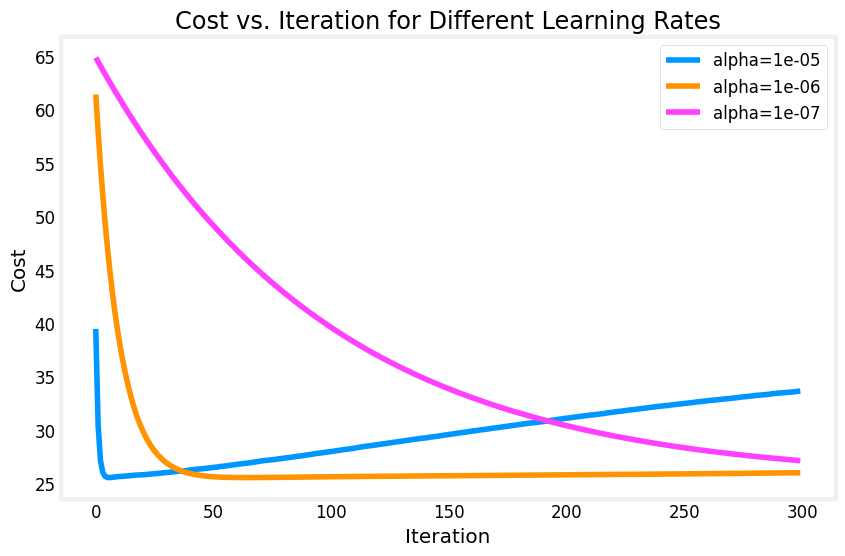

In [14]:
# set up a list of learning rates
alphas = [1e-5, 1e-6, 1e-7]

# plot cost versus iteration for each learning rate
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Cost vs. Iteration for Different Learning Rates')
ax.set_xlabel('Iteration')
ax.set_ylabel('Cost')

for alpha in alphas:
    # initialize parameters
    initial_w = np.zeros_like(w_init)
    initial_b = 0.
    # some gradient descent settings
    iterations = 300

    # run gradient descent with current learning rate
    w_final, b_final, J_hist = stochastic_gradient_descent_a(X_train, y_train, initial_w, 
                                                           initial_b, compute_cost, 
                                                           compute_gradient, alpha, iterations)
        # print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
    print(f"b,w found by gradient descent: {b_final.item():0.6f},{w_final.flatten()[:2]} ")
    m,_ = X_train.shape
    for i in range(m):
        print(f"prediction: {np.dot(X_train[i], w_final) + b_final.item():0.6f}, target value: {y_train[i][0]}")

    # plot cost curve for current learning rate
    ax.plot(J_hist, label=f'alpha={alpha}')

ax.legend()
plt.show()

*These results are not inspiring*! Cost is still declining and our predictions are not very accurate. The next lab will explore how to improve on this.

(b) SGD with decresing step length.

In [15]:
def stochastic_gradient_descent_b(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_epochs, decay_rate):
    """
    Performs stochastic gradient descent to learn w and b. Updates w and b by taking 
    num_epochs passes through the dataset with learning rate alpha, which is decreased 
    by a decay_rate every epoch

    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_epochs (int)    : number of passes through the dataset to run gradient descent
      decay_rate (float)  : the rate of decay for the learning rate

    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    m = X.shape[0] #number of examples

    for epoch in range(num_epochs):
        for i in range(m):

            # Get a random sample from X and y
            rand_idx = random.randint(0, m-1)
            x_i = X[rand_idx, :]
            y_i = y[rand_idx]

            # Calculate the gradient and update the parameters
            dj_db, dj_dw = gradient_function(x_i.reshape(1, -1), y_i, w, b)
            w = w - alpha * dj_dw.flatten()
            b = b - alpha * dj_db

        # Save cost J at the end of each epoch
        J_history.append(cost_function(X, y, w, b))

        # Decrease learning rate alpha
        alpha = alpha / (1 + decay_rate * epoch)

        # Print cost every at intervals 10 times or as many epochs if < 10
        if epoch % math.ceil(num_epochs / 10) == 0:
            print(f"Epoch {epoch:4d}: Cost {J_history[-1]:8.6f} Learning rate: {alpha:0.6f}  ")

    return w, b, J_history

Epoch    0: Cost 63.270110 Learning rate: 0.000000  
Epoch   30: Cost 35.305390 Learning rate: 0.000000  
Epoch   60: Cost 30.837238 Learning rate: 0.000000  
Epoch   90: Cost 30.233771 Learning rate: 0.000000  
Epoch  120: Cost 30.183715 Learning rate: 0.000000  
Epoch  150: Cost 30.181707 Learning rate: 0.000000  
Epoch  180: Cost 30.181670 Learning rate: 0.000000  
Epoch  210: Cost 30.181669 Learning rate: 0.000000  
Epoch  240: Cost 30.181669 Learning rate: 0.000000  
Epoch  270: Cost 30.181669 Learning rate: 0.000000  
b,w found by gradient descent: 0.016786,[0.   0.01] 
prediction: 0.034622, target value: 0.019265573770491803
prediction: 0.036230, target value: 0.06072131147540984
prediction: 0.032827, target value: 0.01377049180327869
prediction: 0.042217, target value: 0.06937704918032787
prediction: 0.039900, target value: 0.057049180327868855
prediction: 0.050523, target value: 0.15081967213114755
prediction: 0.040384, target value: 0.023934426229508195
prediction: 0.035928, 

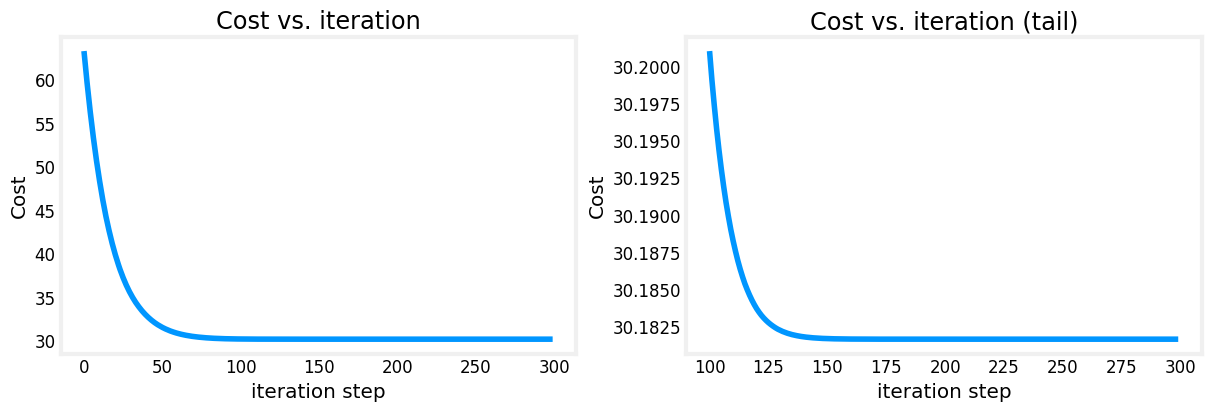

In [16]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 300
alpha = 5.0e-7
decay_rate = 0.001
w_final, b_final, J_hist = stochastic_gradient_descent_b(X_train, y_train, initial_w, 
                                                       initial_b, compute_cost, 
                                                       compute_gradient, alpha, iterations,decay_rate)

# print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
print(f"b,w found by gradient descent: {b_final.item():0.6f},{w_final.flatten()[:2]} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final.item():0.6f}, target value: {y_train[i][0]}")


# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

(c) Demonstrate early termination. (If the result is not perfect, please demonstrate it in discussion.)

As can be seen from the figure, in fact, at the 100th round with a good alpha, the cost will no longer decrease and the training can be stopped.

 (d) (optional) Compare GD and SGD under large dataset.


Random gradient descent To ensure convergence, it is necessary to use a smaller step size and more iteration rounds than gradient descent under the same conditions.

In [14]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.6f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

Iteration    0: Cost 64.324406   
Iteration   25: Cost 46.899183   
Iteration   50: Cost 37.200681   
Iteration   75: Cost 31.829343   
Iteration  100: Cost 28.875153   
Iteration  125: Cost 27.266510   
Iteration  150: Cost 26.403357   
Iteration  175: Cost 25.950552   
Iteration  200: Cost 25.721575   
Iteration  225: Cost 25.613118   
b,w found by gradient descent: 0.024097,[0.   0.01] 
prediction: 0.051045, target value: 0.019265573770491803
prediction: 0.053929, target value: 0.06072131147540984
prediction: 0.048705, target value: 0.01377049180327869
prediction: 0.062337, target value: 0.06937704918032787
prediction: 0.059056, target value: 0.057049180327868855
prediction: 0.076588, target value: 0.15081967213114755
prediction: 0.059764, target value: 0.023934426229508195
prediction: 0.053031, target value: 0.028439344262295083
prediction: 0.052629, target value: 0.020262295081967214
prediction: 0.061541, target value: 0.03252459016393443
prediction: 0.058522, target value: 0.0770

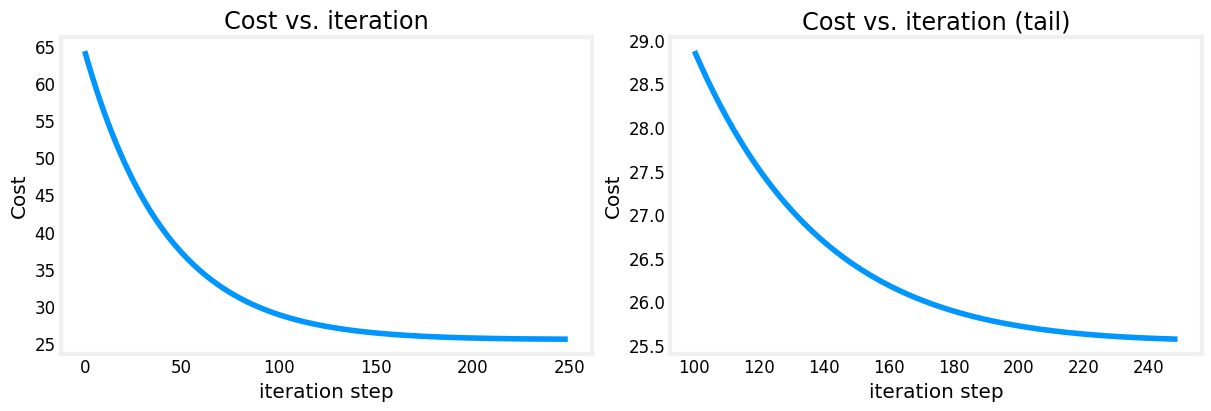

In [15]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 250
alpha = 5.0e-3
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)

# print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
print(f"b,w found by gradient descent: {b_final[0]:0.6f},{w_final[:2]} ")
m,_ = X_train.shape
for i in range(m):
    # print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final[0]:0.6f}, target value: {y_train[i][0]}")


# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()